### Association Rule Mining
Association rules are one of the important machine learning techniques used in market analysis and recommendation systems. By examining the relationship between the user and the products, the user's habits are observed and various actions are implemented as a result of this observation. For example; Recommended movies and TV series on Netflix, recommended products while shopping on Amazon, daily mix lists created based on songs listened to on Spotify. All of these are done to increase sales, viewing and listening rates.

Many algorithms are used for association rules, the most popular of which is the Apriori Algorithm. There are 3 important concepts we need to know in the Apriori algorithm; Support, Confidence and Lift.

Let X and Y denote the products in the market, and N denote the total number of products. <br>

**Support**: Indicates how often X and Y occur together.<br>
**Confidence:**  It indicates the probability that a customer who buys product X will buy product Y. <br>
**Lift:** Indicates how much the sales of product Y increase when product X is purchased.

**Problem Statement:** In market analysis and recommendation systems, the aim is to uncover meaningful product associations from transactional data to understand customer behavior, boost sales, and enhance user experience with personalized recommendations. Leveraging the Apriori algorithm, we focus on three vital metrics: Support, Confidence, and Lift.

In [1]:
import pandas as pd

In [2]:
#read data into a dataframe
df = pd.read_csv("GroceryStoreDataSet.csv", names=['products'],header=None)

df

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [3]:
df.shape

(20, 1)

In [4]:
df.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COKE,BISCUIT,CORNFLAKES'],
       ['COFFEE,COKE,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COKE'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [5]:
data  =list(df['products'].apply(lambda x:x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COKE', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COKE'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [6]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 653.6 kB/s eta 0:00:03
   ----------- ---------------------------- 0.4/1.4 MB 4.2 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 5.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 5.2 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


### Converting MBA (Item set) into Binary (True / False)

In [7]:
from mlxtend.preprocessing import TransactionEncoder

In [8]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COFFEE,COKE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


The value True indicates that the item is present in the transaction, while False indicates absence.

In [9]:
# What is the freq of each items
df.sum()

BISCUIT        7
BOURNVITA      4
BREAD         13
COFFEE         8
COKE           3
CORNFLAKES     6
JAM            2
MAGGI          5
MILK           5
SUGER          6
TEA            7
dtype: int64

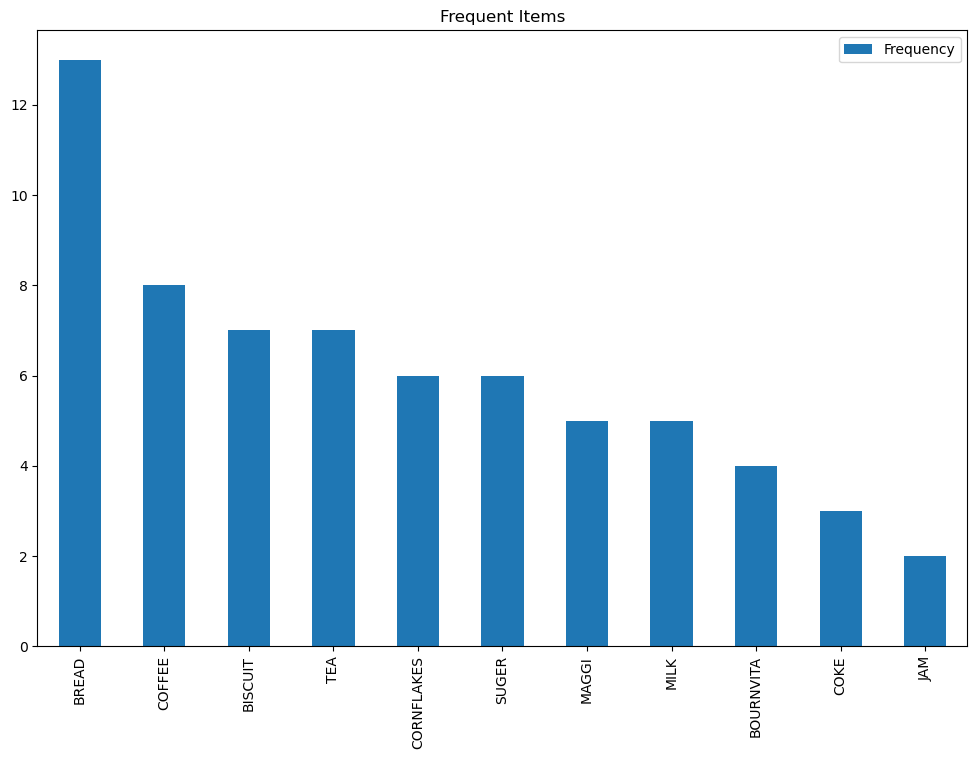

In [10]:
import matplotlib.pyplot as plt

df.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind="bar",
                                                                           figsize=(12,8),
                                                                           title="Frequent Items")

plt.show()

From the above analysis we can say that Bread has occur most of the time and Jam has occur least.

In [11]:
df.shape[1]

11

In [12]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0],columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COKE,0.15


In [13]:
# Elimination by Support value
first[first.Support >= 0.30]

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30


In [14]:
import itertools

In [15]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COKE'],
 ['BREAD', 'JAM'],
 ['COFFEE', 'BISCUIT'],
 ['COFFEE', 'TEA'],
 ['COFFEE', 'CORNFLAKES'],
 ['COFFEE', 'SUGER'],
 ['COFFEE', 'MAGGI'],
 ['COFFEE', 'MILK'],
 ['COFFEE', 'BOURNVITA'],
 ['COFFEE', 'COKE'],
 ['COFFEE', 'JAM'],
 ['BISCUIT', 'TEA'],
 ['BISCUIT', 'CORNFLAKES'],
 ['BISCUIT', 'SUGER'],
 ['BISCUIT', 'MAGGI'],
 ['BISCUIT', 'MILK'],
 ['BISCUIT', 'BOURNVITA'],
 ['BISCUIT', 'COKE'],
 ['BISCUIT', 'JAM'],
 ['TEA', 'CORNFLAKES'],
 ['TEA', 'SUGER'],
 ['TEA', 'MAGGI'],
 ['TEA', 'MILK'],
 ['TEA', 'BOURNVITA'],
 ['TEA', 'COKE'],
 ['TEA', 'JAM'],
 ['CORNFLAKES', 'SUGER'],
 ['CORNFLAKES', 'MAGGI'],
 ['CORNFLAKES', 'MILK'],
 ['CORNFLAKES', 'BOURNVITA'],
 ['CORNFLAKES', 'COKE'],
 ['CORNFLAKES', 'JAM'],
 ['SUGER', 'MAGGI'],
 ['SUGER', 'MILK'],
 ['SUGER', 'BOURNVITA'],
 ['SUGER', 'COKE'],
 ['SUGER', 'JA

In [16]:
from mlxtend.frequent_patterns import apriori

In [17]:
pd.set_option("display.max_rows",None)

In [18]:
df1 = apriori(df,min_support=0.01,use_colnames=True)
df1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.15,(COKE)
5,0.30,(CORNFLAKES)
6,0.10,(JAM)
7,0.25,(MAGGI)
8,0.25,(MILK)
9,0.30,(SUGER)


In [19]:
df1.sort_values(by='support',ascending=False)

,support,itemsets
2,0.65,(BREAD)
3,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
9,0.30,(SUGER)
7,0.25,(MAGGI)
8,0.25,(MILK)
34,0.20,"(SUGER, COFFEE)"
28,0.20,"(BREAD, MILK)"


In [20]:
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.40,(COFFEE),1
4,0.15,(COKE),1
5,0.30,(CORNFLAKES),1
6,0.10,(JAM),1
7,0.25,(MAGGI),1
8,0.25,(MILK),1
9,0.30,(SUGER),1


In [21]:
df1[(df1['length']==2) & (df1['support']>=0.15)]

,support,itemsets,length
11,0.20,"(BREAD, BISCUIT)",2
14,0.15,"(CORNFLAKES, BISCUIT)",2
19,0.15,"(BREAD, BOURNVITA)",2
23,0.15,"(BREAD, COFFEE)",2
27,0.15,"(BREAD, MAGGI)",2
28,0.20,"(BREAD, MILK)",2
29,0.20,"(BREAD, SUGER)",2
30,0.20,"(BREAD, TEA)",2
31,0.15,"(COKE, COFFEE)",2
32,0.20,"(CORNFLAKES, COFFEE)",2


In [22]:
from mlxtend.frequent_patterns import association_rules

In [23]:
# Association rules & Info
df_ar = association_rules(df1, metric = "confidence", min_threshold = 0.5)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
1,(COKE),(BISCUIT),0.15,0.35,0.10,0.666667,1.904762,0.0475,1.950000,0.558824
2,(CORNFLAKES),(BISCUIT),0.30,0.35,0.15,0.500000,1.428571,0.0450,1.300000,0.428571
3,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000,0.166667
4,(BOURNVITA),(SUGER),0.20,0.30,0.10,0.500000,1.666667,0.0400,1.400000,0.500000
5,(BOURNVITA),(TEA),0.20,0.35,0.10,0.500000,1.428571,0.0300,1.300000,0.375000
6,(JAM),(BREAD),0.10,0.65,0.10,1.000000,1.538462,0.0350,inf,0.388889
7,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000
8,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000,0.250000
9,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641,0.0050,1.050000,0.035714


In [24]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.60)].sort_values("confidence", ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05,0.035714
12,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
14,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80,0.571429
8,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75,0.250000
20,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25,0.750000


In [25]:
df_lift = association_rules(df1, metric = "lift", min_threshold=1)
# displaying result with lift >=1
df_lift.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
225,"(BREAD, JAM)","(MAGGI, MILK)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
254,"(CORNFLAKES, TEA)","(MILK, COFFEE)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
211,"(BISCUIT, COFFEE)","(COKE, CORNFLAKES)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf,1.000000
214,"(COKE, CORNFLAKES)","(BISCUIT, COFFEE)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf,1.000000
232,(JAM),"(BREAD, MAGGI, MILK)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
228,"(MAGGI, MILK)","(BREAD, JAM)",0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
169,"(MAGGI, MILK)",(JAM),0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
221,"(BREAD, MAGGI, MILK)",(JAM),0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368
252,"(MILK, CORNFLAKES)","(COFFEE, TEA)",0.10,0.05,0.05,0.500000,10.000000,0.0450,1.900000,1.000000
255,"(MILK, COFFEE)","(CORNFLAKES, TEA)",0.05,0.10,0.05,1.000000,10.000000,0.0450,inf,0.947368


In [26]:
df_lift = association_rules(df1, metric = "lift", min_threshold=0) #displaying results with lift >=0
# displaying result with lift == 1
df_lift[df_lift['lift'] == 1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
79,"(BREAD, BISCUIT)",(MAGGI),0.20,0.25,0.05,0.25,1.0,0.0,1.0,0.0
82,(MAGGI),"(BREAD, BISCUIT)",0.25,0.20,0.05,0.20,1.0,0.0,1.0,0.0
187,"(BREAD, MILK)",(MAGGI),0.20,0.25,0.05,0.25,1.0,0.0,1.0,0.0
190,(MAGGI),"(BREAD, MILK)",0.25,0.20,0.05,0.20,1.0,0.0,1.0,0.0
206,"(CORNFLAKES, COFFEE)",(MILK),0.20,0.25,0.05,0.25,1.0,0.0,1.0,0.0
207,(MILK),"(CORNFLAKES, COFFEE)",0.25,0.20,0.05,0.20,1.0,0.0,1.0,0.0


The lift value of 1 indicates that the antecedents and consequents are independent of each other.